In [1]:
import matplotlib.pyplot as plt
import numpy as np
import constant
%load_ext autoreload
%autoreload 2

FileNotFoundError: ./data/time/cad113/times_2qubit_1layer_zxz_layer.txt not found.

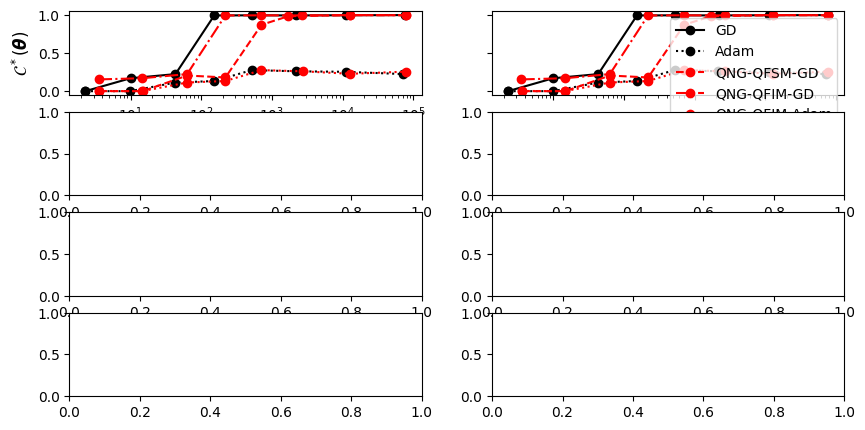

In [21]:
fig, axs = plt.subplots(4, 2, figsize = (10, 5))

for k, ansatz in enumerate(constant.ansatzs):
    
    ax = axs[k, 0]
    # --------- Begin: Draw cost and time for various qubit numbers ---------
    num_qubits = list(range(2, 10)) # 2 to 10 qubit
    num_layer = 1
    ansatz = constant.ansatzs[k]
    for j, optimizer in enumerate(constant.optimizers_name):
        losss = []
        times = []
        for i, num_qubit in enumerate(num_qubits):
            # Load data
            loss = np.loadtxt(f"./data/loss/loss_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")
            time = np.loadtxt(f"./data/time/cad113/times_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")

            losss.append(loss[j][-1])
            times.append(time[j]*50)
        ax.plot(times, losss, marker = 'o', label = constant.optimizers_name[j], linestyle = constant.line_styles[j], color = constant.colors[j])
    # --------- End: Draw cost and time for various qubit numbers ---------
    
    # --------- Begin: Draw cost and time for various layer numbers ---------
    ax = axs[k, 1]
    num_layers = list(range(2, 10)) # 2 to 10 qubit
    num_qubits = 5
    for j, optimizer in enumerate(constant.optimizers_name):
        losss = []
        times = []
        for i, num_qubit in enumerate(num_layers):
            # Load data
            loss = np.loadtxt(f"./data/loss/loss_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")
            time = np.loadtxt(f"./data/time/cad113/times_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")

            losss.append(loss[j][-1])
            times.append(time[j]*50)
        ax.plot(times, losss, marker = 'o', label = constant.optimizers_name[j], linestyle = constant.line_styles[j], color = constant.colors[j])

    # --------- End: Draw cost and time for various layer numbers ---------
    for l in [0,1]:
        axs[k, l].set_xscale("log")
        
        if l == 0:
            axs[k, l].set_ylabel(r"$\mathcal{C}^* (\boldsymbol{\theta})$", fontsize = 12)
        if l == 1:
            axs[k, l].set_yticklabels([])
    if k == 3:
        axs[k, l].set_xlabel("Time (s)")
    else:
        axs[k, l].set_xticklabels([])
    ax.legend()
plt.show()

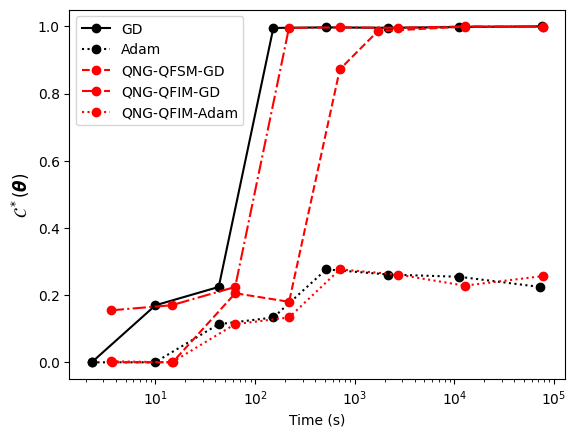

In [12]:
num_layers = list(range(2, 10)) # 2 to 10 qubit
num_qubits = 5
ansatz = "g2gn"
for j, optimizer in enumerate(constant.optimizers_name):
    losss = []
    times = []
    for i, num_qubit in enumerate(num_layers):
        # Load data
        loss = np.loadtxt(f"./data/loss/loss_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")
        time = np.loadtxt(f"./data/time/cad113/times_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")

        losss.append(loss[j][-1])
        times.append(time[j]*50)
    plt.plot(times, losss, marker = 'o', label = constant.optimizers_name[j], linestyle = constant.line_styles[j], color = constant.colors[j])

plt.xscale("log")
plt.xlabel("Time (s)")
plt.ylabel(r"$\mathcal{C}^* (\boldsymbol{\theta})$", fontsize = 12)
plt.legend()
plt.show()